# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

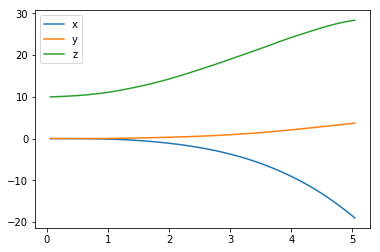

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

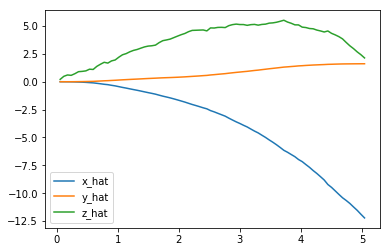

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

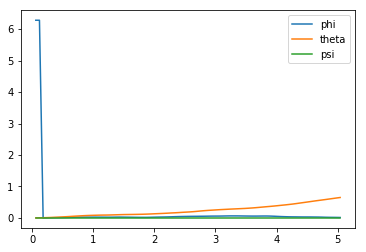

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

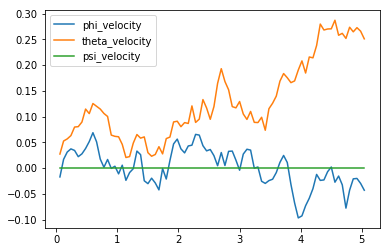

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

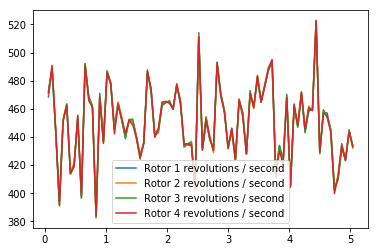

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.90102793e+01  3.71503459e+00  2.83641724e+01  1.40826265e-02
  6.48772564e-01  0.00000000e+00]
[-12.21807133   1.61232283   2.13468818]
[-0.04308407  0.25113742  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.431 (best =   0.400), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [33]:
import sys
import pandas as pd
import csv
import numpy as np
from agents.agent import DDPG
from task import Task

## my version
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 500
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

rewards = []
best_total_reward = 0

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        total_reward += reward
        if total_reward > best_total_reward:
            best_total_reward = total_reward
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            to_write = [i_episode] + [total_reward]
            rewards.append(total_reward)
            x, y, z = task.sim.pose[:3]
            print("\r\nEpisode = {:4d}, total_reward = {:7.3f} (best = {:7.3f}) pos={:7.3f} {:7.3f} {:7.3f} distance={}".format(
                i_episode, total_reward, best_total_reward, x, y, z, task.distance_from_target), end="")
            break
    sys.stdout.flush()
        

## version 1 
# # Modify the values below to give the quadcopter a different starting position.
# runtime = 5.                                     # time limit of the episode
# init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
# init_velocities = np.array([0., 0., 0.])         # initial velocities
# init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
# file_output = 'rewards.txt'                      # file name for saved results

# num_episodes = 500
# target_pos = np.array([0., 0., 100.])
# task = Task(target_pos=target_pos)
# agent = DDPG(task) 

# labels = ['episod', 'total_reward']
# results = {x : [] for x in labels}

# with open(file_output, 'w') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(labels)  
#     best_total_reward = 0
#     for i_episode in range(1, num_episodes+1):
#         state = agent.reset_episode() # start a new episode
#         total_reward = 0
#         while True:
#             action = agent.act(state) 
#             next_state, reward, done = task.step(action)
#             total_reward += reward
#             if total_reward > best_total_reward:
#                 best_total_reward = total_reward
#             agent.step(action, reward, next_state, done)
#             state = next_state
#             if done:
#                 to_write = [i_episode] + [total_reward]
#                 for ii in range(len(labels)):
#                     results[labels[ii]].append(to_write[ii])
#                 writer.writerow(to_write)
#                 x, y, z = task.sim.pose[:3]
#                 print("\r\nEpisode = {:4d}, total_reward = {:7.3f} (best = {:7.3f}) pos={:7.3f} {:7.3f} {:7.3f} distance={}".format(
#                     i_episode, total_reward, best_total_reward, x, y, z, task.distance_from_target), end="")
#                 break
#         sys.stdout.flush()


###################

## version 2 
# num_episodes = 500
# # Take off task
# # Quadcopter stands still at the ground and has as target a height of 100 above the sarting point
# init_pos = np.array([0., 0., 0., 0., 0., 0.])
# target_pos = np.array([0., 0., 100.])
# task = Task(init_pose=init_pos, target_pos=target_pos,runtime=10.)
# agent = DDPG(task)

# rewards = []

# max_reward = 0
# for i_episode in range(1, num_episodes+1):
#     state = agent.reset_episode() # start a new episode
#     total_reward = 0
#     while True:
#         action = agent.act(state)
#         next_state, reward, done = task.step(action)
#         total_reward += reward
#         max_reward = max(max_reward, total_reward)
#         agent.step(action, reward, next_state, done)
#         state = next_state
#         if done:
#             rewards.append(total_reward)
#             x, y, z = task.sim.pose[:3]
#             print("\r\nEp={:4d}, score={:7.3f} (best={:7.3f}) pos={:7.3f} {:7.3f} {:7.3f} distance={}".format(
#                 i_episode, total_reward, max_reward, x, y, z, task.distance_from_target), end="")
#             break
#     sys.stdout.flush()


Episode =    1, total_reward = 804.327 (best = 804.327) pos= -3.854   2.908   0.000 distance=100.11649914875277
Episode =    2, total_reward = 804.495 (best = 804.495) pos= -3.939   2.961   0.000 distance=100.12134067555947
Episode =    3, total_reward = 804.177 (best = 804.495) pos= -3.500   2.330   0.000 distance=100.088345838998
Episode =    4, total_reward = 771.865 (best = 804.495) pos=  0.677  -0.414   0.000 distance=100.0031479423019
Episode =    5, total_reward = 835.750 (best = 835.750) pos= -0.000   0.618   0.000 distance=100.00191214920994
Episode =    6, total_reward = 835.842 (best = 835.842) pos= -0.000   0.571   0.000 distance=100.0016295290654
Episode =    7, total_reward = 835.840 (best = 835.842) pos=  0.000   0.588   0.000 distance=100.00173110819951
Episode =    8, total_reward = 779.766 (best = 835.842) pos= -0.000  15.744   0.000 distance=101.23175881842536
Episode =    9, total_reward = 4102.475 (best = 4102.475) pos=  0.582  -3.472  50.939 distance=49.187355202

Episode =   73, total_reward = 937.873 (best = 17092.573) pos= -7.058   0.001   0.000 distance=100.24876813036487
Episode =   74, total_reward = 937.076 (best = 17092.573) pos= -7.083  -0.013   0.000 distance=100.25056151271177
Episode =   75, total_reward = 938.829 (best = 17092.573) pos= -6.951   0.002   0.000 distance=100.24128541473912
Episode =   76, total_reward = 939.059 (best = 17092.573) pos= -6.971  -0.000   0.000 distance=100.24265383165087
Episode =   77, total_reward = 937.540 (best = 17092.573) pos= -7.064  -0.004   0.000 distance=100.2492203264043
Episode =   78, total_reward = 938.927 (best = 17092.573) pos= -6.987  -0.010   0.000 distance=100.2438273235949
Episode =   79, total_reward = 906.401 (best = 17092.573) pos= -7.777  -0.156   0.000 distance=100.30204957746143
Episode =   80, total_reward = 5317.142 (best = 17092.573) pos= -0.006   0.396  82.932 distance=17.07302049958508
Episode =   81, total_reward = 5009.753 (best = 17092.573) pos=  0.009 -15.493  79.939 dis

Episode =  144, total_reward = 9901.826 (best = 17092.573) pos=-28.308  -9.295 133.265 distance=44.657443735365185
Episode =  145, total_reward = 8351.431 (best = 17092.573) pos=  7.319  29.039 157.672 distance=64.98390480592717
Episode =  146, total_reward = 6245.858 (best = 17092.573) pos=-62.448   1.637 123.970 distance=66.91049739921242
Episode =  147, total_reward = 5980.395 (best = 17092.573) pos=-12.163 -64.944 115.074 distance=67.7707372760302
Episode =  148, total_reward = 10915.915 (best = 17092.573) pos=  4.594  12.507 137.826 distance=40.10456637936953
Episode =  149, total_reward = 6452.635 (best = 17092.573) pos=115.964  50.465 300.000 distance=236.63143271965308
Episode =  150, total_reward = 8481.511 (best = 17092.573) pos=-36.764 -22.751 127.385 distance=51.17806909582414
Episode =  151, total_reward = 6277.723 (best = 17092.573) pos=-49.564 -14.502 118.221 distance=54.76267856028548
Episode =  152, total_reward = 7925.296 (best = 17092.573) pos= 28.888 -12.097 147.167

Episode =  215, total_reward = 4748.922 (best = 17092.573) pos=  0.000 -21.988  78.531 distance=30.731430739248857
Episode =  216, total_reward = 4639.656 (best = 17092.573) pos=  0.007  25.629  76.616 distance=34.694141917787164
Episode =  217, total_reward = 4651.894 (best = 17092.573) pos=  0.000 -24.608  79.742 distance=31.874019143260764
Episode =  218, total_reward = 4943.378 (best = 17092.573) pos= -0.002 -17.592  79.277 distance=27.183079015118416
Episode =  219, total_reward = 3813.168 (best = 17092.573) pos=  0.001 -51.578  54.232 distance=68.95637811661115
Episode =  220, total_reward = 4328.645 (best = 17092.573) pos=  0.311  33.397  74.725 distance=41.883928882478855
Episode =  221, total_reward = 4865.010 (best = 17092.573) pos=  0.659 -18.452  80.156 distance=27.10481915563075
Episode =  222, total_reward = 4618.379 (best = 17092.573) pos=  0.004 -26.483  75.716 distance=35.9311804346502
Episode =  223, total_reward = 5105.586 (best = 17092.573) pos= -0.001  11.807  81.6

Episode =  286, total_reward = 8838.437 (best = 17682.110) pos= 25.315 -26.017 145.985 distance=58.58622727926096
Episode =  287, total_reward = 6110.231 (best = 17682.110) pos=-64.620  -4.560 111.768 distance=65.84049120492168
Episode =  288, total_reward = 9962.586 (best = 17682.110) pos=-12.097   8.260 137.446 distance=40.2087548709452
Episode =  289, total_reward = 5949.147 (best = 17682.110) pos=  7.868 112.933 300.000 distance=229.81702524659613
Episode =  290, total_reward = 6435.043 (best = 17682.110) pos= -7.966  60.430 300.000 distance=209.0818823205141
Episode =  291, total_reward = 9831.580 (best = 17682.110) pos=-20.425 -18.917 133.889 distance=43.857671850130025
Episode =  292, total_reward = 9984.053 (best = 17682.110) pos= -9.154 -17.439 136.436 distance=41.4185982820856
Episode =  293, total_reward = 9771.013 (best = 17682.110) pos=  7.110 -32.099 139.365 distance=51.28880097151615
Episode =  294, total_reward = 10642.236 (best = 17682.110) pos= -4.091  12.215 137.694 

Episode =  357, total_reward = 2300.153 (best = 17682.110) pos= -5.162  -0.630   0.000 distance=100.13513539451458
Episode =  358, total_reward = 937.598 (best = 17682.110) pos= -1.853   0.003   0.000 distance=100.0171674437806
Episode =  359, total_reward = 937.503 (best = 17682.110) pos= -1.894  -0.002   0.000 distance=100.0179254429886
Episode =  360, total_reward = 937.432 (best = 17682.110) pos= -1.909  -0.050   0.000 distance=100.01822894359617
Episode =  361, total_reward = 937.559 (best = 17682.110) pos= -1.866   0.002   0.000 distance=100.0174080821238
Episode =  362, total_reward = 937.618 (best = 17682.110) pos= -1.827  -0.015   0.000 distance=100.01669640989938
Episode =  363, total_reward = 937.474 (best = 17682.110) pos= -1.897   0.000   0.000 distance=100.01798325120738
Episode =  364, total_reward = 937.247 (best = 17682.110) pos= -1.975  -0.007   0.000 distance=100.01949286735233
Episode =  365, total_reward = 937.339 (best = 17682.110) pos= -1.940  -0.023   0.000 dist

Episode =  428, total_reward = 937.341 (best = 17682.110) pos= -1.945   0.004   0.000 distance=100.01892206681221
Episode =  429, total_reward = 937.556 (best = 17682.110) pos= -1.867   0.002   0.000 distance=100.01741921771881
Episode =  430, total_reward = 937.525 (best = 17682.110) pos= -1.867  -0.009   0.000 distance=100.01742079867955
Episode =  431, total_reward = 937.471 (best = 17682.110) pos= -1.904  -0.012   0.000 distance=100.01812461371489
Episode =  432, total_reward = 937.570 (best = 17682.110) pos= -1.849   0.001   0.000 distance=100.01709504282012
Episode =  433, total_reward = 937.299 (best = 17682.110) pos= -1.963  -0.005   0.000 distance=100.01926638890357
Episode =  434, total_reward = 937.579 (best = 17682.110) pos= -1.857   0.003   0.000 distance=100.01724664167972
Episode =  435, total_reward = 937.448 (best = 17682.110) pos= -1.913   0.002   0.000 distance=100.0183002230785
Episode =  436, total_reward = 937.574 (best = 17682.110) pos= -1.847  -0.000   0.000 dis

Episode =  499, total_reward = 1168.222 (best = 17682.110) pos= 10.791   1.166   0.000 distance=100.5873110108436
Episode =  500, total_reward = 1074.639 (best = 17682.110) pos=-11.582   0.732   0.000 distance=100.67118064572242

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

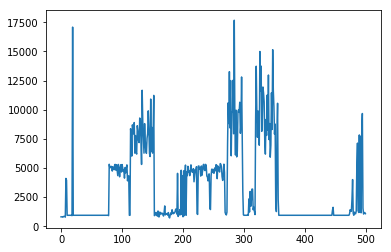

In [34]:
# plt.plot(results['episod'], results['total_reward'])
plt.plot(rewards, label='rewards')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: Drone is starting at the ground and his task is to lift up and got to the target which is 100 unit over the ground. Rewards function is based on distance from the target with some bulgarian constans to make it more obvious for the network.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- 
- i went for defaults, this was waay too complicated for me
- I used several dense and dropouts layers with relu as activation function.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- hard
- aha moment
- not sure, i was trying to find simple way how to visualize the drone but this part is missing from the project (which is terribly bad). Drone was trying to get to the target but hardest part was to lift of.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- definitely getting started. cnn project was much easier to understand with all those unit tests and smaller parts.
- even though that the drone was not able to reach the target at least it learned how to be close to it